In [25]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('DataScientist.csv',error_bad_lines=False)
df.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [19]:
def process_salary(df):
    df.rename(columns = {'Type of ownership':'Ownership','Salary Estimate':'Salary'}, inplace = True)
    df.drop(['Unnamed: 0','index'],axis = 1, inplace = True)
    df[~df['Salary'].isin(["hour"])]['Salary'].unique()
    df = df[~df['Salary'].isin(["hour"])]
    df['Salary'] = df['Salary'].apply(lambda x:x.split()[0])
    df['Salary'] = df['Salary'].apply(lambda x:x.replace('$',''))
    df['Salary'] = df['Salary'].apply(lambda x:x.replace('K',' '))
    df['Salary'] = df['Salary'].apply(lambda x:x.replace('(Employer',' '))
    df['Salary'] = df['Salary'].apply(sim)
    df['Salary'].unique()
    return df

def sim(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        tokens[1] = float(tokens[1])
        tokens[0] = float(tokens[0])
        diff = tokens[1] - tokens[0]
        rdm1 = tokens[0] + diff * np.random.uniform(0,1)
        rdm2 = tokens[0] + diff * np.random.uniform(0,1)
        rdm3 = tokens[0] + diff * np.random.uniform(0,1)
        av_rdm = (rdm1+rdm2+rdm3)/3
        return av_rdm
    try:
        return float(x)
    except:
        return None


In [20]:
def clean_description(df):
    df['Job Description'] = df['Job Description'].apply(lambda x: re.sub('[^\s]*[\*]+[^\s]*', "", x))
    df['Job Description'] = df['Job Description'].apply(lambda x: re.sub('[^\s]*.com[^\s]*', "", x))
    df['Job Description'] = df['Job Description'].apply(lambda x: re.sub('[^\s]*www.[^\s]*', "", x))
    df['Job Description'] = df['Job Description'].apply(lambda x:x.replace("\n", ""))
    df['Job Description'] = df['Job Description'].apply(lambda x: x.lower())
    df['Job Description'] = df['Job Description'].apply(lambda x: re.sub('\w*\d\w*','', x))
    df['Job Description'] = df['Job Description'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
    df['Job Description'] = df['Job Description'].apply(lambda x: re.sub(' +',' ',x))
    return df

In [21]:
df = process_salary(df)
df = clean_description(df)
df.head()

,Job Title,Salary,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Senior Data Scientist,142.414547,about hopperat hopper we’re on a mission to ma...,3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",148.133473,at noom we use scientifically proven methods t...,4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,159.252562,decodemdata science manager job descriptionwe’...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,Data Analyst,126.082833,sapphire digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",148.620875,director data science descriptionedelman intel...,3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [22]:
corpus = " ".join(df['Job Description'].tolist())

tokens = word_tokenize(corpus)

answer = nltk.pos_tag(tokens)
answer_pos = [a[1] for a in answer]

all_pos = pd.Series(answer_pos)
all_pos.value_counts().head()

NN     485578
JJ     218928
NNS    218899
IN     193902
CC     128106
dtype: int64

In [23]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')
lmtzr = WordNetLemmatizer()

def remove_stopwords(s):
    global en_stopwords
    s = word_tokenize(s)
    s = " ".join([w for w in s if w not in en_stopwords])
    return s

df['Job Description New'] = df['Job Description'].map(remove_stopwords)


corpus = " ".join(df['Job Description New'].tolist())

tokenized_corpus = nltk.word_tokenize(corpus)

lemmatized_tokens = [lmtzr.lemmatize(token) for token in tokenized_corpus]

fd = nltk.FreqDist(lemmatized_tokens)

top_words = []
for key, value in fd.items():
    top_words.append((key, value))

top_words = sorted(top_words, key = lambda x:x[1], reverse = True)

top_words = top_words[:10]

top_words

[('data', 33935),
 ('experience', 14224),
 ('business', 9739),
 ('team', 9028),
 ('work', 8750),
 ('year', 6827),
 ('science', 5844),
 ('development', 5442),
 ('analysis', 5179),
 ('skill', 5018)]

In [24]:
corpus_n = " ".join(df['Job Description New'].tolist())

tokens_n = word_tokenize(corpus_n)

answer_n = nltk.pos_tag(tokens_n)
answer_pos_n = [a[1] for a in answer_n]

all_pos_n = pd.Series(answer_pos_n)
all_pos_n.value_counts().head()

NN     459099
JJ     223202
NNS    213844
VBG     74276
VBP     70919
dtype: int64

In [8]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(df['Job Description New'])
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

clusters = kmeans.labels_

In [9]:
df['Text_Clusters'] = clusters
np.unique(df['Text_Clusters'],return_counts = True)

(array([0, 1, 2], dtype=int32), array([  61, 2532, 1316]))

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X.toarray())

x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]
df['x0'] = x0
df['x1'] = x1

In [11]:
df[df['Text_Clusters'] == 0]['Job Title']

237     Quantum Data Scientist (Industrial-Process sec...
321     Quantum Principal Data Scientist (Industrial-D...
322     Quantum Principal Data Scientist (Industrial-P...
394     Quantum Data Scientist (Industrial-Process sec...
463               Principal Data Scientist- Public Sector
                              ...                        
3774              Principal Data Scientist- Public Sector
3779    Quantum Principal Data Scientist (Industrial-P...
3787                       Microsoft Analytics Consultant
3794    Quantum Principal Data Scientist (Industrial-D...
3810                  Microsoft Dynamics CRM Data Analyst
Name: Job Title, Length: 61, dtype: object

In [12]:
df[df['Text_Clusters'] == 1]['Job Title']

0                   Senior Data Scientist
1       Data Scientist, Product Analytics
2                    Data Science Manager
4                  Director, Data Science
5                          Data Scientist
                      ...                
3903         Cyber Security Data Engineer
3904                    AWS Data Engineer
3905                Data Analyst â Junior
3906     Security Analytics Data Engineer
3907     Security Analytics Data Engineer
Name: Job Title, Length: 2532, dtype: object

In [13]:
df[df['Text_Clusters'] == 2]['Job Title']

3                                            Data Analyst
66                        People Analytics Data Scientist
79                              Healthcare Data Scientist
80           Data Scientist - Relocate to Washington D.C.
93                                           Data Analyst
                              ...                        
3884            Senior Research Scientist - RI IPP Cooper
3885                               Technical Data Analyst
3893     Biotransformation Scientist and DMPK Design Lead
3895    Senior/Principal Scientist - Display Technolog...
3908    Patient Safety Physician or Safety Scientist -...
Name: Job Title, Length: 1316, dtype: object

In [14]:
def get_top_keywords(n_terms):
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
quantumenabled,prepostprocessing,career,foundational,reinventing,ibmers,qiskit,progressive,quantum,ibm

Cluster 1
models,years,work,team,machine,science,analytics,learning,business,experience

Cluster 2
related,employment,laboratory,information,research,support,required,development,work,experience


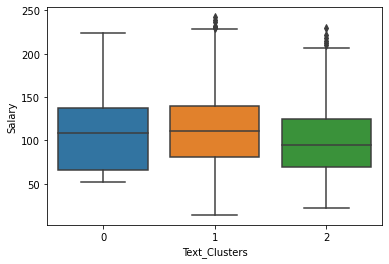

In [15]:
df['Text_Clusters'] = df['Text_Clusters'].apply(str)
sns.boxplot(x = 'Text_Clusters', y = 'Salary',data = df)

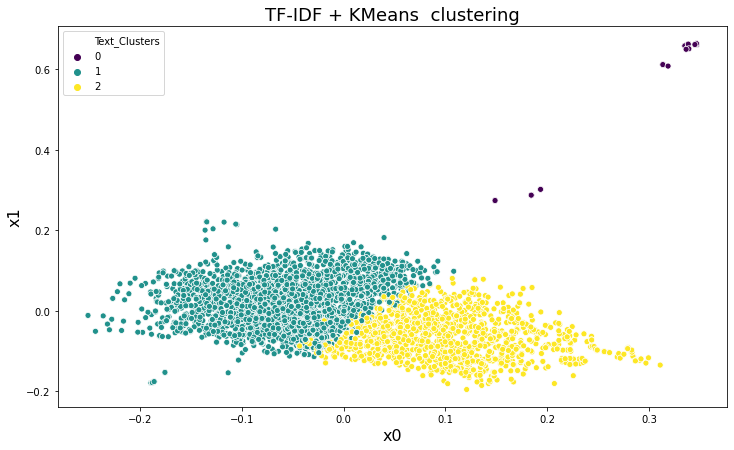

In [16]:
plt.figure(figsize=(12, 7))
plt.title("TF-IDF + KMeans  clustering", fontdict={"fontsize": 18})

plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})

sns.scatterplot(data=df, x='x0', y='x1', hue='Text_Clusters', palette="viridis")
plt.show()